<a href="https://colab.research.google.com/github/nyurashku/IST_718_Big_Data_Analytics_Jane_Street_Kaggle_Competition/blob/main/ben_google_collab_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount only the Jane_Street_Data folder
drive.mount("/content/drive/", force_remount=True)
folder_path_p0 = "/content/drive/MyDrive/Jane_Street_Data/train.parquet/partition_id=0/part-0.parquet"




Mounted at /content/drive/


In [2]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder.appName("ReadLargeParquet").getOrCreate()

# Read all Parquet files in the Jane_Street_Data folder
DF1 = spark.read.parquet(folder_path_p0)

# Show schema and first few rows
DF1.printSchema()
DF1.show(5)


root
 |-- date_id: short (nullable = true)
 |-- time_id: short (nullable = true)
 |-- symbol_id: byte (nullable = true)
 |-- weight: float (nullable = true)
 |-- feature_00: float (nullable = true)
 |-- feature_01: float (nullable = true)
 |-- feature_02: float (nullable = true)
 |-- feature_03: float (nullable = true)
 |-- feature_04: float (nullable = true)
 |-- feature_05: float (nullable = true)
 |-- feature_06: float (nullable = true)
 |-- feature_07: float (nullable = true)
 |-- feature_08: float (nullable = true)
 |-- feature_09: byte (nullable = true)
 |-- feature_10: byte (nullable = true)
 |-- feature_11: short (nullable = true)
 |-- feature_12: float (nullable = true)
 |-- feature_13: float (nullable = true)
 |-- feature_14: float (nullable = true)
 |-- feature_15: float (nullable = true)
 |-- feature_16: float (nullable = true)
 |-- feature_17: float (nullable = true)
 |-- feature_18: float (nullable = true)
 |-- feature_19: float (nullable = true)
 |-- feature_20: float (n

In [3]:
DF1.describe()

DataFrame[summary: string, date_id: string, time_id: string, symbol_id: string, weight: string, feature_00: string, feature_01: string, feature_02: string, feature_03: string, feature_04: string, feature_05: string, feature_06: string, feature_07: string, feature_08: string, feature_09: string, feature_10: string, feature_11: string, feature_12: string, feature_13: string, feature_14: string, feature_15: string, feature_16: string, feature_17: string, feature_18: string, feature_19: string, feature_20: string, feature_21: string, feature_22: string, feature_23: string, feature_24: string, feature_25: string, feature_26: string, feature_27: string, feature_28: string, feature_29: string, feature_30: string, feature_31: string, feature_32: string, feature_33: string, feature_34: string, feature_35: string, feature_36: string, feature_37: string, feature_38: string, feature_39: string, feature_40: string, feature_41: string, feature_42: string, feature_43: string, feature_44: string, feat

In [4]:
DF1.printSchema()

root
 |-- date_id: short (nullable = true)
 |-- time_id: short (nullable = true)
 |-- symbol_id: byte (nullable = true)
 |-- weight: float (nullable = true)
 |-- feature_00: float (nullable = true)
 |-- feature_01: float (nullable = true)
 |-- feature_02: float (nullable = true)
 |-- feature_03: float (nullable = true)
 |-- feature_04: float (nullable = true)
 |-- feature_05: float (nullable = true)
 |-- feature_06: float (nullable = true)
 |-- feature_07: float (nullable = true)
 |-- feature_08: float (nullable = true)
 |-- feature_09: byte (nullable = true)
 |-- feature_10: byte (nullable = true)
 |-- feature_11: short (nullable = true)
 |-- feature_12: float (nullable = true)
 |-- feature_13: float (nullable = true)
 |-- feature_14: float (nullable = true)
 |-- feature_15: float (nullable = true)
 |-- feature_16: float (nullable = true)
 |-- feature_17: float (nullable = true)
 |-- feature_18: float (nullable = true)
 |-- feature_19: float (nullable = true)
 |-- feature_20: float (n

In [5]:
from pyspark.sql import SparkSession

import pandas as pd
DF1.count()
df1_pandas = DF1.limit(100000).toPandas()  # Convert only 100,000 rows


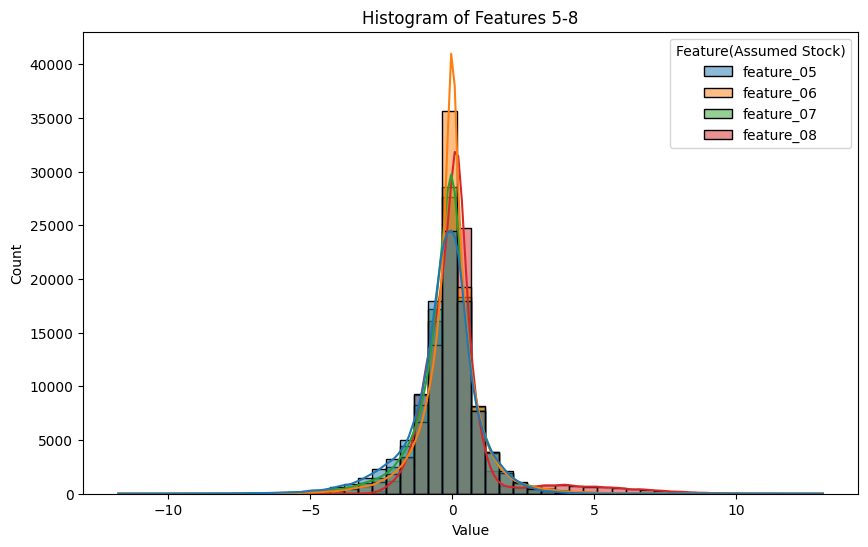

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


# Melt the dataframe for easy multi-column plotting
df_melted = df1_pandas.melt(value_vars=["feature_05", "feature_06", "feature_07","feature_08"], var_name="Feature(Assumed Stock)", value_name="Value")

# Create a multi-column histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_melted, x="Value", hue="Feature(Assumed Stock)", bins=50, kde=True)

# Add title
plt.title("Histogram of Features 5-8")
plt.show()


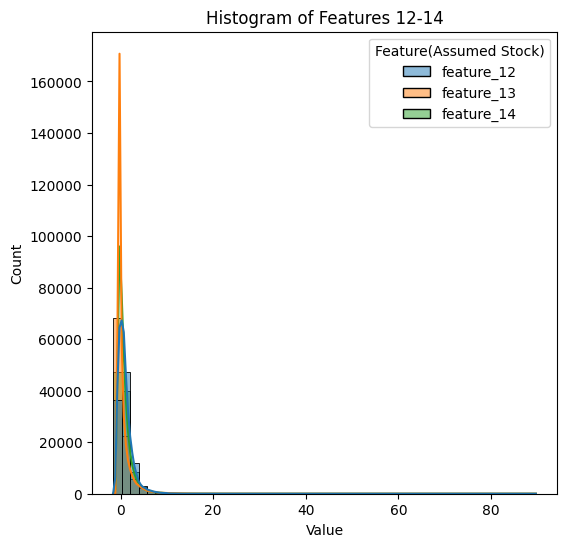

In [15]:
df_melted = df1_pandas.melt(value_vars=["feature_12", "feature_13", "feature_14"], var_name="Feature(Assumed Stock)", value_name="Value")


plt.figure(figsize=(6, 6))
sns.histplot(data=df_melted, x="Value", hue="Feature(Assumed Stock)", bins=50, kde=True)

# Add title
plt.title("Histogram of Features 12-14")
plt.show()


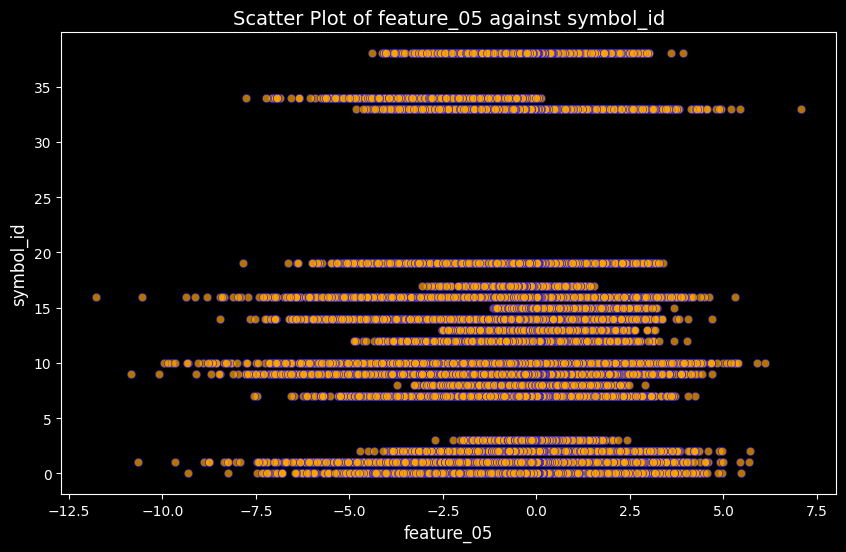

In [21]:
plt.style.use("dark_background")

x_column = "feature_05"
y_column = "symbol_id"

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df1_pandas, x=x_column, y=y_column, color="orange", edgecolor="blue", alpha=0.7)

plt.title(f"Scatter Plot of {x_column} against {y_column}", fontsize=14, color="white")
plt.xlabel(x_column, fontsize=12, color="white")
plt.ylabel(y_column, fontsize=12, color="white")

plt.show()